In [305]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
import random
%matplotlib inline

### Modelo y muestras aleatorias

In [307]:
def f(x):
    '''
    Returns a sample with instances without noise.
    '''
    y = 6*np.sin(x) + np.cos(3*x) + 20 - 0.5*(x-4)**2 + 12*np.exp(-(x-7)**2*14)
    return (y)

def sample(x, f, noise):
    '''
    Returns a sample with 'size' instances.
    '''
    mn = np.min(f(x))
    mx = np.max(f(x))
    y = f(x) + np.random.normal(loc=0, scale=noise*(mx-mn), size=len(x))
    return (y)

Settings:

In [314]:
Xmin = 0
Xmax = 10
Nsamples = 50
noise = 0.1

Text(0, 0.5, 'variable dependiente, Y')

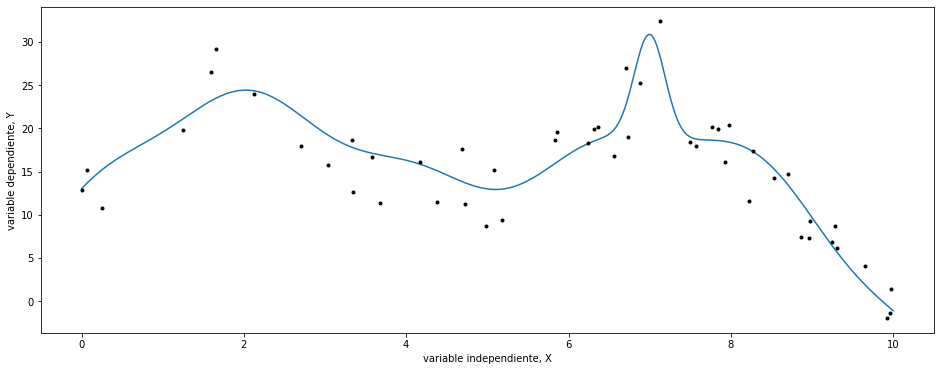

In [315]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

x = np.linspace(Xmin, Xmax, 300)
y = f(x)

ax.plot(x, y)

xs = np.random.uniform(Xmin, Xmax, Nsamples)
ys = sample(xs, f, noise)

ax.plot(xs, ys, 'k.')
ax.set_xlabel('variable independiente, X'); ax.set_ylabel('variable dependiente, Y')

### Ajuste de modelos anidados

In [316]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

Text(0, 0.5, 'variable dependiente, Y')

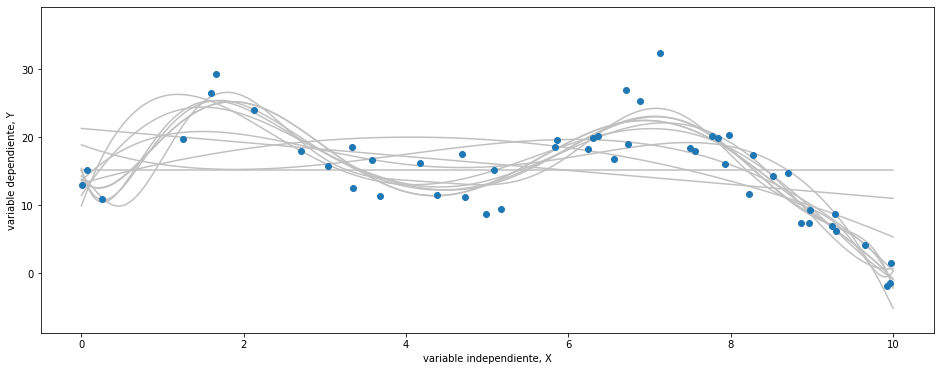

In [317]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

for i in range(12):
    model = fit_polynomial(xs, ys, i)
    p_y = apply_polynomial(model, x)

    ax.plot(x, p_y, color='silver')

ax.plot(xs, ys, "o")
ax.set_ylim(min(ys)-2*noise*(max(ys)-min(ys)), max(ys)+2*noise*(max(ys)-min(ys)))
ax.set_xlabel('variable independiente, X'); ax.set_ylabel('variable dependiente, Y')

### Promedio de ajustes

In [341]:
degree = 16
n_samples = 60
n_models = 20

Text(0, 0.5, 'variable dependiente, Y')

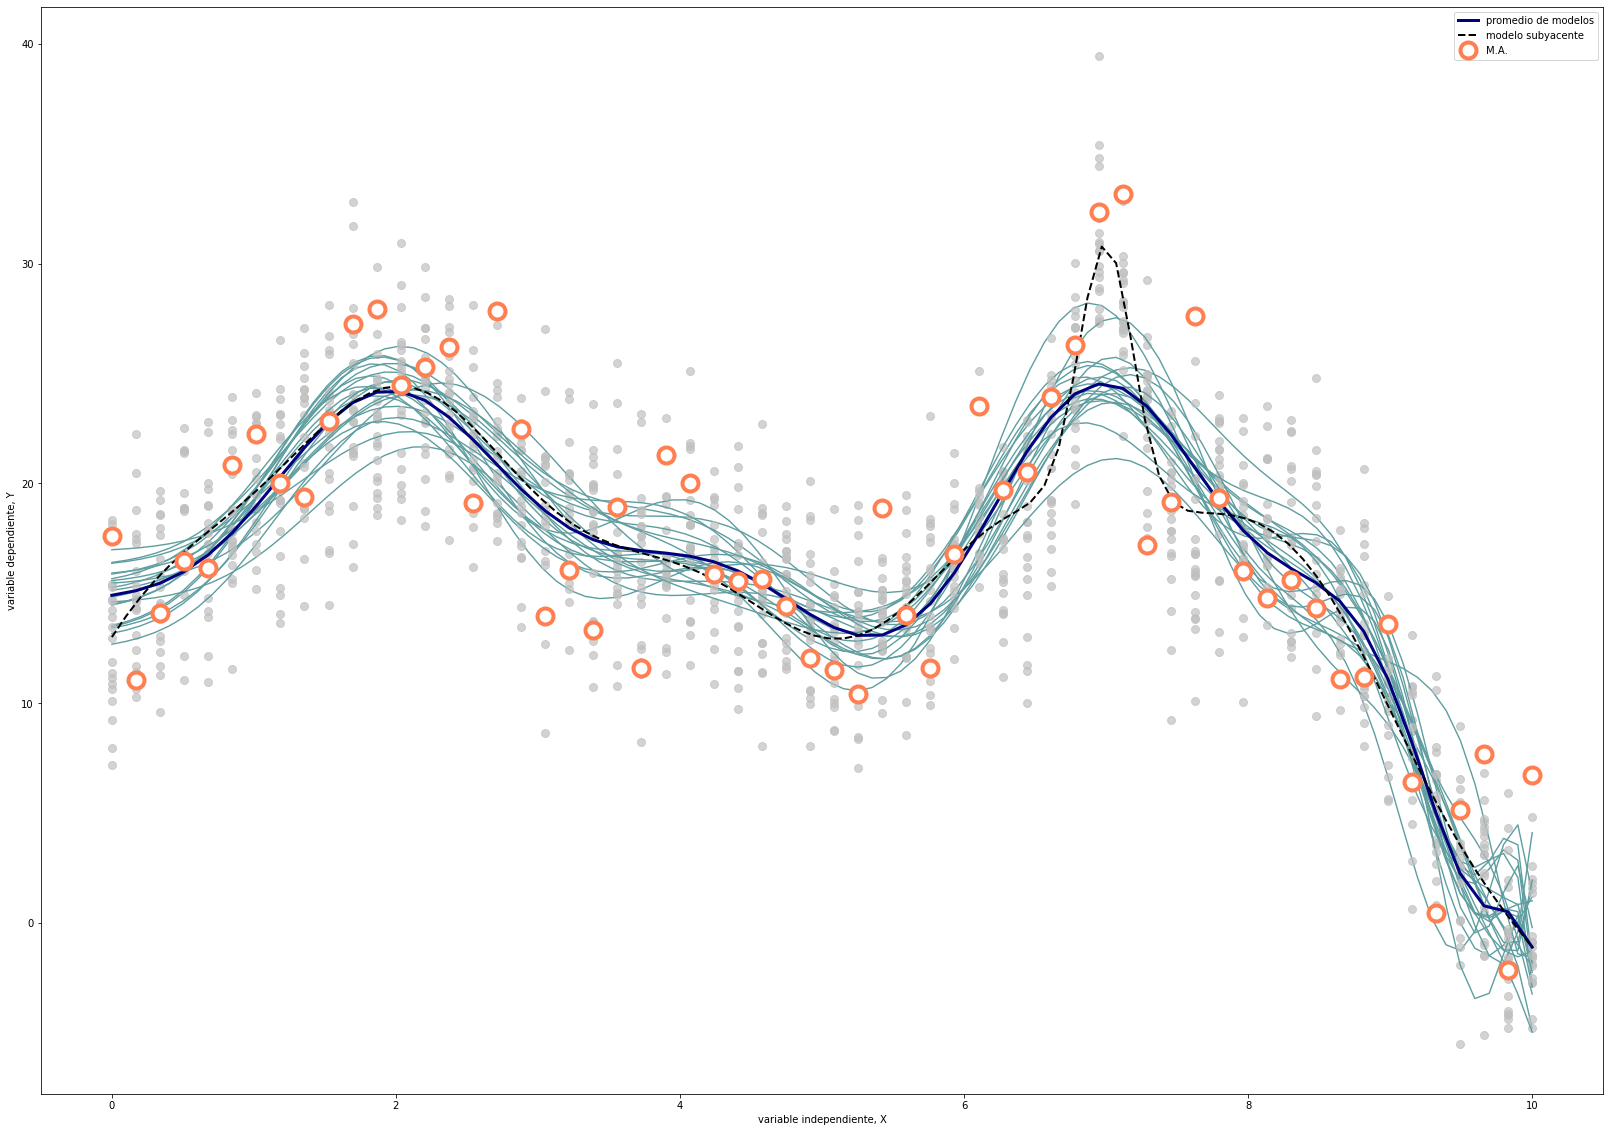

In [342]:
fig = plt.figure(figsize=(28, 20))
ax = fig.add_subplot()

xd = np.linspace(Xmin, Xmax, 100)
xs = np.linspace(Xmin, Xmax, n_samples)

avg_y = np.zeros(n_samples)
for i in np.arange(n_models):
    ys = sample(xs, f, noise)
    model = fit_polynomial(xs, ys, degree)
    p_y = apply_polynomial(model, xs)
    avg_y = avg_y + p_y
    p_y = apply_polynomial(model, xd)
    ax.plot(xd, p_y, color='cadetblue', lw=1.4)
    ax.plot(xs, ys, marker='.', color='silver', markersize=16, linestyle='None', alpha=0.7)
avg_y = avg_y / n_models

ys = sample(xs, f, noise)

ax.plot(xs, avg_y, color='navy',lw=3, label='promedio de modelos')
ax.plot(xd, f(xd), 'k--', lw=2, label='modelo subyacente')
ax.plot(xs, ys, marker='o', mfc='white', mec='coral', mew=4, markersize=16, linestyle='None', label='M.A.')
ax.legend()
ax.set_xlabel('variable independiente, X'); ax.set_ylabel('variable dependiente, Y')

### Sesgo y varianza teóricos
Vamos a hacer una estimacion de la varianza y del sesgo

In [343]:
Nsamples = 50
n_models = 100
max_degree = 15
noise = 0.1

xs = np.linspace(0, Xmax, Nsamples)
yt = f(xs)

BIAS2 = []
VARIANCE = []

In [344]:
for degree in range(1, max_degree):
    
    avg_y = np.zeros(Nsamples)
    models = []
    for i in np.arange(n_models):        
        ys = sample(xs, f, noise)
        model = fit_polynomial(xs, ys, degree)
        p_y = apply_polynomial(model, xs)        
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    
    BIAS2.append(norm(avg_y - yt)**2)
    
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance / ys.size * n_models
    VARIANCE.append(variance)    

In [345]:
print(len(BIAS2), len(VARIANCE), max_degree)

14 14 15


In [346]:
ERROR = np.array(BIAS2) + np.array(VARIANCE)  # falta la varianza del ruido, que es constante

In [347]:
print(len(BIAS2), len(VARIANCE), max_degree, len(ERROR))

14 14 15 14


Text(0, 0.5, 'ERROR')

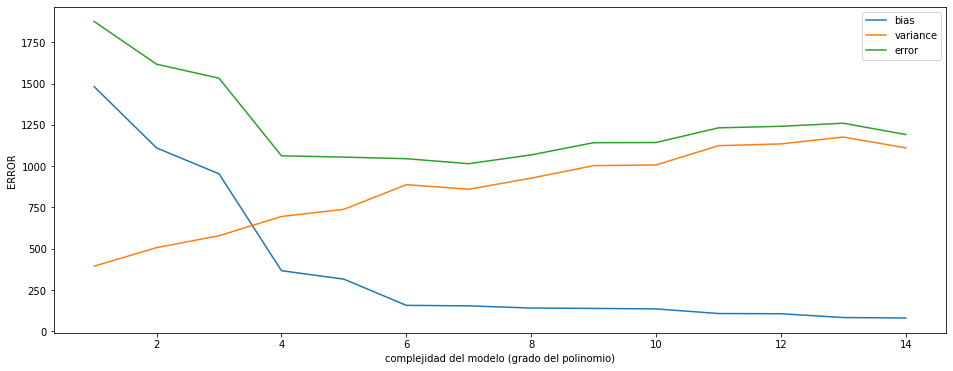

In [348]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(range(1, max_degree), BIAS2, label='bias')
ax.plot(range(1, max_degree), VARIANCE, label='variance')
ax.plot(range(1, max_degree), ERROR, label='error')
ax.legend()
ax.set_xlabel('complejidad del modelo (grado del polinomio)'); ax.set_ylabel('ERROR')

### Validación cruzada

En la vida real no tenemos la función, la idea es que tenemos una muestra, de la cual separamos dos submuestras, una de entrenamiento y una de validación.

In [376]:
n_samples = 300
n_train = 30

# simulamos una muestra:
x_all = np.linspace(0, Xmax, n_samples)
y_all = sample(x_all, f, 0.15)

# muestras de entrenamiento y validacion:
ids = random.sample(range(n_samples), n_train)

In [377]:
ids

[295,
 197,
 249,
 299,
 170,
 237,
 163,
 210,
 281,
 60,
 19,
 158,
 145,
 73,
 26,
 251,
 277,
 113,
 124,
 106,
 191,
 128,
 152,
 1,
 274,
 268,
 222,
 150,
 107,
 208]

In [378]:
x_train = [x_all[k] for k in range(len(x_all)) if k in ids]
y_train = [y_all[k] for k in range(len(x_all)) if k in ids]

x_test = [x_all[k] for k in range(len(x_all)) if k not in ids]
y_test = [y_all[k] for k in range(len(x_all)) if k not in ids]

Text(0, 0.5, 'Y')

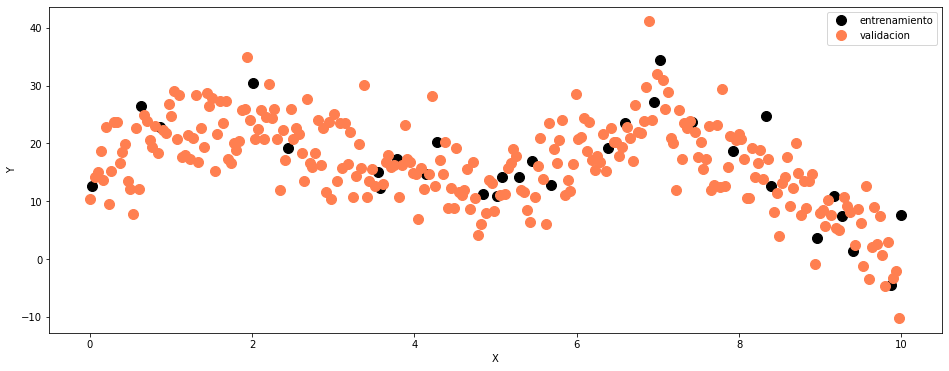

In [379]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(x_all, y_all, "ok")
ax.plot(x_train, y_train, ".", color='black', markersize=20, label='entrenamiento')
ax.plot(x_test, y_test, ".", color='coral',  markersize=20, label='validacion')
ax.legend()
ax.set_xlabel('X'); ax.set_ylabel('Y')

In [380]:
max_degree = 10

test_error_vals = []
train_error_vals = []

for degree in np.arange(0, max_degree):
    
    model = fit_polynomial(x_train, y_train, degree)
    
    y_model = apply_polynomial(model, x_train)
    #train_error_vals.append(norm(y_train - y_model)**2)
    train_error_vals.append(np.dot(y_train - y_model, y_train - y_model))
    
    y_model = apply_polynomial(model, x_test)
    #test_error_vals.append(norm(y_test - y_model)**2)
    test_error_vals.append(np.dot(y_test - y_model, y_test - y_model))

In [381]:
train_error_vals

[2124.339835133245,
 1739.4822957060323,
 1569.9229360100362,
 1246.4672747535055,
 927.0607422992997,
 595.8732706411712,
 475.33735917277386,
 461.32231764659923,
 458.40044651783563,
 455.9476652396978]

In [370]:
test_error_vals

[1184.887130090084,
 1153.542825731941,
 879.4233207573304,
 845.9997944603274,
 1492.6167770704321,
 905.9868257305678,
 921.2958795042169,
 10429.309677165558,
 13633.813536799844,
 33912.69362578619]

### TAREA:

- Graficar el error de prueba para distintas divisiones aleatorias de las muestras de entrenamiento y validación.
- Graficar el error de prueba para distintas muestras haciendo validación cruzada de 10 capas